<a href="https://colab.research.google.com/github/sachinsaireddy/randomwalk-ds-assessment-level3/blob/main/Ds_assingnment_level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books_df = pd.read_csv('/content/books.csv')
book_tags_df = pd.read_csv('/content/book_tags.csv')
ratings_df = pd.read_csv('/content/ratings.csv')

1. How many books do not have an original title [books.csv]?



In [13]:
temp = books_df['original_title'].isnull().sum()
print('Number of books do not have an original title : ',temp)

Number of books do not have an original title :  36


2.How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [18]:
books_df_cleaned = books_df.dropna(subset=['original_title'])

unique_books = pd.merge(books_df_cleaned, book_tags_df, left_on='goodreads_book_id', right_on='goodreads_book_id')
unique_books = pd.merge(unique_books, ratings_df, left_on='book_id', right_on='book_id')['book_id'].nunique()
print(f"Number of unique books in the dataset: {unique_books}")



Number of unique books in the dataset: 363


3.How many unique users are present in the dataset [ratings.csv]?


In [27]:
unique_users = ratings_df['user_id'].nunique()
print("Unique users in the dataset:", unique_users)


Unique users in the dataset: 40836


4. How many unique tags are there in the dataset [book_tags.csv]?


In [14]:
unique_tags = book_tags_df['tag_id'].nunique()
print("Number of unique tags in the dataset : ", unique_tags)


Number of unique tags in the dataset :  3651


5.Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

In [8]:
most_used_tag = book_tags_df['tag_id'].value_counts().idxmax()
print("Tag_id most frequently used: " ,most_used_tag)

Tag_id most frequently used:  4600


6.Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv]

In [19]:
merged_df = pd.merge(book_tags_df, books_df, left_on='goodreads_book_id', right_on='goodreads_book_id')
most_tags_count = merged_df.groupby('title')['tag_id'].count().idxmax()
print(f"Book with the most tags count: {most_tags_count}")

Book with the most tags count: #GIRLBOSS


7.Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

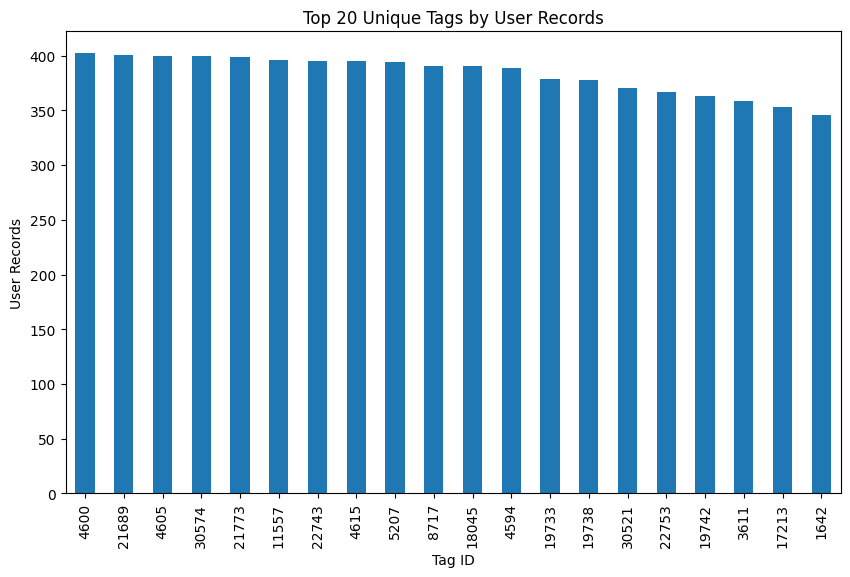

In [22]:
import matplotlib.pyplot as plt

# Count user records for each tag and sort
top_tags = book_tags_df.groupby('tag_id').size().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
top_tags.plot(kind='bar')
plt.title('Top 20 Unique Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('User Records')
plt.show()
